<a href="https://colab.research.google.com/github/edwinmgallego/Best-README-Template/blob/main/adv_121_clase_webscraping_baloto_kdd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

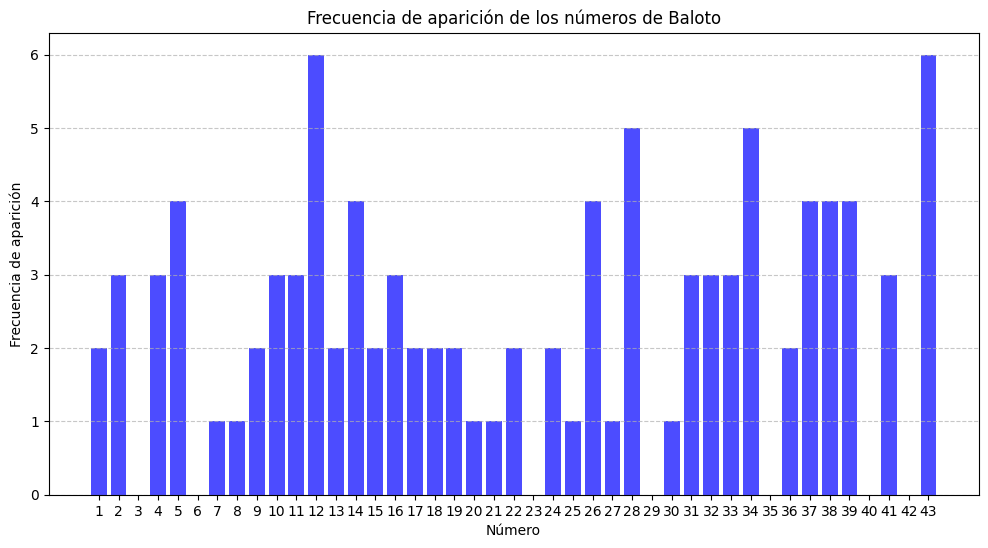

Se recomienda considerar los siguientes números para jugar: [12, 43, 28, 34, 5]


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# URL de la página con los resultados históricos del Baloto
url = 'https://www.balotoresultados.co/historico'

# Solicitar la página
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Extraer la tabla de resultados
table = soup.find('table')
headers = [header.text.strip() for header in table.find_all('th')]
rows = table.find_all('tr')[1:]

data = []
for row in rows:
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    data.append(cols)

df = pd.DataFrame(data, columns=headers)

# Preprocesamiento
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')
df['Números Baloto'] = df['Números Baloto'].apply(lambda x: [int(num) for num in x.split()])

# Transformación
for i in range(1, 6):
    df[f'Baloto_{i}'] = df['Números Baloto'].apply(lambda x: x[i-1])
df['Superbalota'] = df['Números Baloto'].apply(lambda x: x[5])
df.drop(columns=['Números Baloto', 'Números Revancha'], inplace=True)

# Minería de datos
all_numbers = pd.concat([df[f'Baloto_{i}'] for i in range(1, 6)])
frequency = all_numbers.value_counts().sort_index()

# Evaluación
plt.figure(figsize=(12, 6))
plt.bar(frequency.index, frequency.values, color='blue', alpha=0.7)
plt.xlabel('Número')
plt.ylabel('Frecuencia de aparición')
plt.title('Frecuencia de aparición de los números de Baloto')
plt.xticks(range(1, 44))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Uso: Generación de recomendaciones
top_numbers = frequency.nlargest(5)
recommended_numbers = top_numbers.index.tolist()
print("Se recomienda considerar los siguientes números para jugar:", recommended_numbers)
